In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, interp2d
from scipy.misc import derivative 
from scipy.optimize import approx_fprime
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline

In [3]:
# Creat a 2d asymetric potential based on list of minimas
# and standard deviations
minima = [[0.0,0.0], [1.0,0.0] , [1.1, 1.0], [-0.1,0.9], [-1.3,0.8], [-1.0,-0.2], [-0.6,-1.0], [0.9,-0.8], [0.2,-1.5]]
sigmas = [[0.3,0.3],[0.35,0.35],  [0.4,0.3],  [0.4,0.23], [0.25,0.35],  [0.25,0.32],   [0.4,0.28], [0.4,0.3], [0.21,0.45]]
def potential(r):
    x = r[0]
    y = r[1]
    #r = np.sqrt(x*x + y*y)
    output = 0
    for i in range(len(minima)):
        mx = minima[i][0]
        my = minima[i][1]
        sigx = sigmas[i][0]
        sigy = sigmas[i][1]
        gauss = np.exp(-(x - mx)**2/(2*sigx**2)-(y - my)**2/(2*sigy**2))
        gauss = gauss/(2*np.pi*sigx*sigy)
        output = output - gauss
    return output

def gradpot(x,y):
    #r = np.sqrt(x*x + y*y)
    outx = 0
    outy = 0
    for i in range(len(minima)):
        mx = minima[i][0]
        my = minima[i][1]
        sigx = sigmas[i][0]
        sigy = sigmas[i][1]
        gradx = -(2*(x-mx)/(2*sigx))*np.exp(-(x - mx)**2/(2*sigx**2)-(y - my)**2/(2*sigy**2))
        gradx = gradx/(2*np.pi*sigx*sigy)
        grady = -(2*(y-my)/(2*sigy))*np.exp(-(x - mx)**2/(2*sigx**2)-(y - my)**2/(2*sigy**2))
        grady = grady/(2*np.pi*sigx*sigy)
        outx = outx - gradx
        outy = outy - grady
    return [outx,outy]

def gradnorm(x,y):
    #r = np.sqrt(x*x + y*y)
    outx = 0
    outy = 0
    for i in range(len(minima)):
        mx = minima[i][0]
        my = minima[i][1]
        sigx = sigmas[i][0]
        sigy = sigmas[i][1]
        gradx = -(2*(x-mx)/(2*sigx))*np.exp(-(x - mx)**2/(2*sigx**2)-(y - my)**2/(2*sigy**2))
        gradx = gradx/(2*np.pi*sigx*sigy)
        grady = -(2*(y-my)/(2*sigy))*np.exp(-(x - mx)**2/(2*sigx**2)-(y - my)**2/(2*sigy**2))
        grady = grady/(2*np.pi*sigx*sigy)
        outx = outx - gradx
        outy = outy - grady
    out = np.sqrt(outx*outx + outy*outy)
    return out

<IPython.core.display.Javascript object>


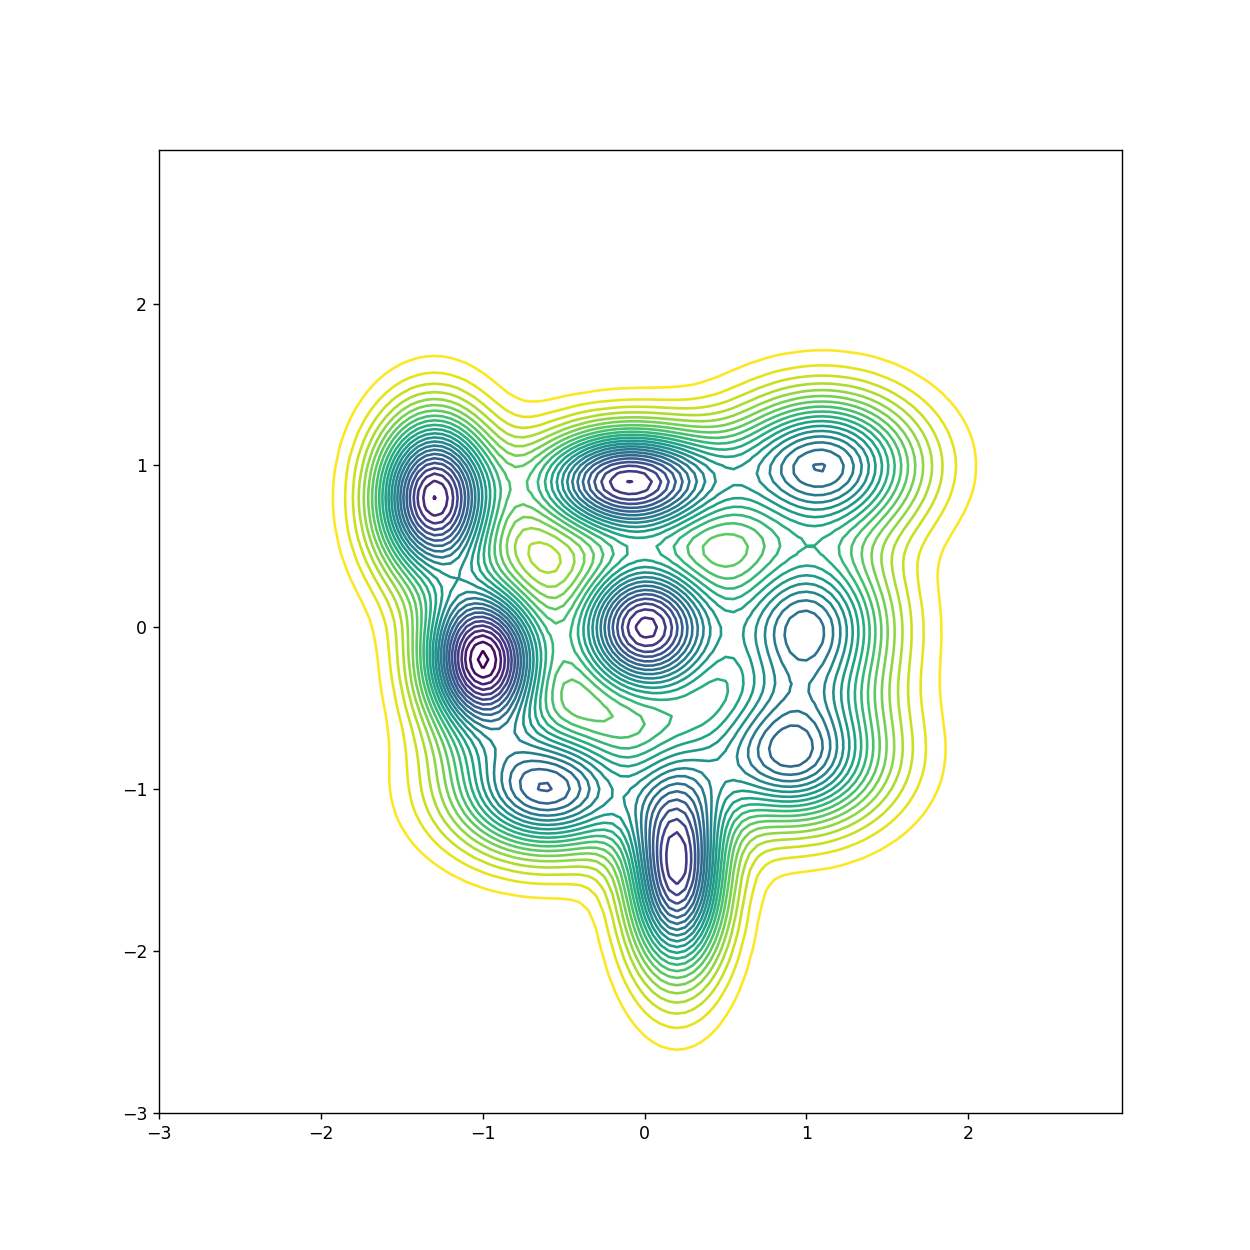

In [4]:
x = np.arange(-3,3,0.05)
y = np.arange(-3,3,0.05)
xx, yy = np.meshgrid(x,y)
z = potential([xx,yy])
plt.rcParams['figure.figsize'] = (10, 10)
plt.contour(xx, yy, z, 25)
plt.axes().set_aspect('equal')

<IPython.core.display.Javascript object>


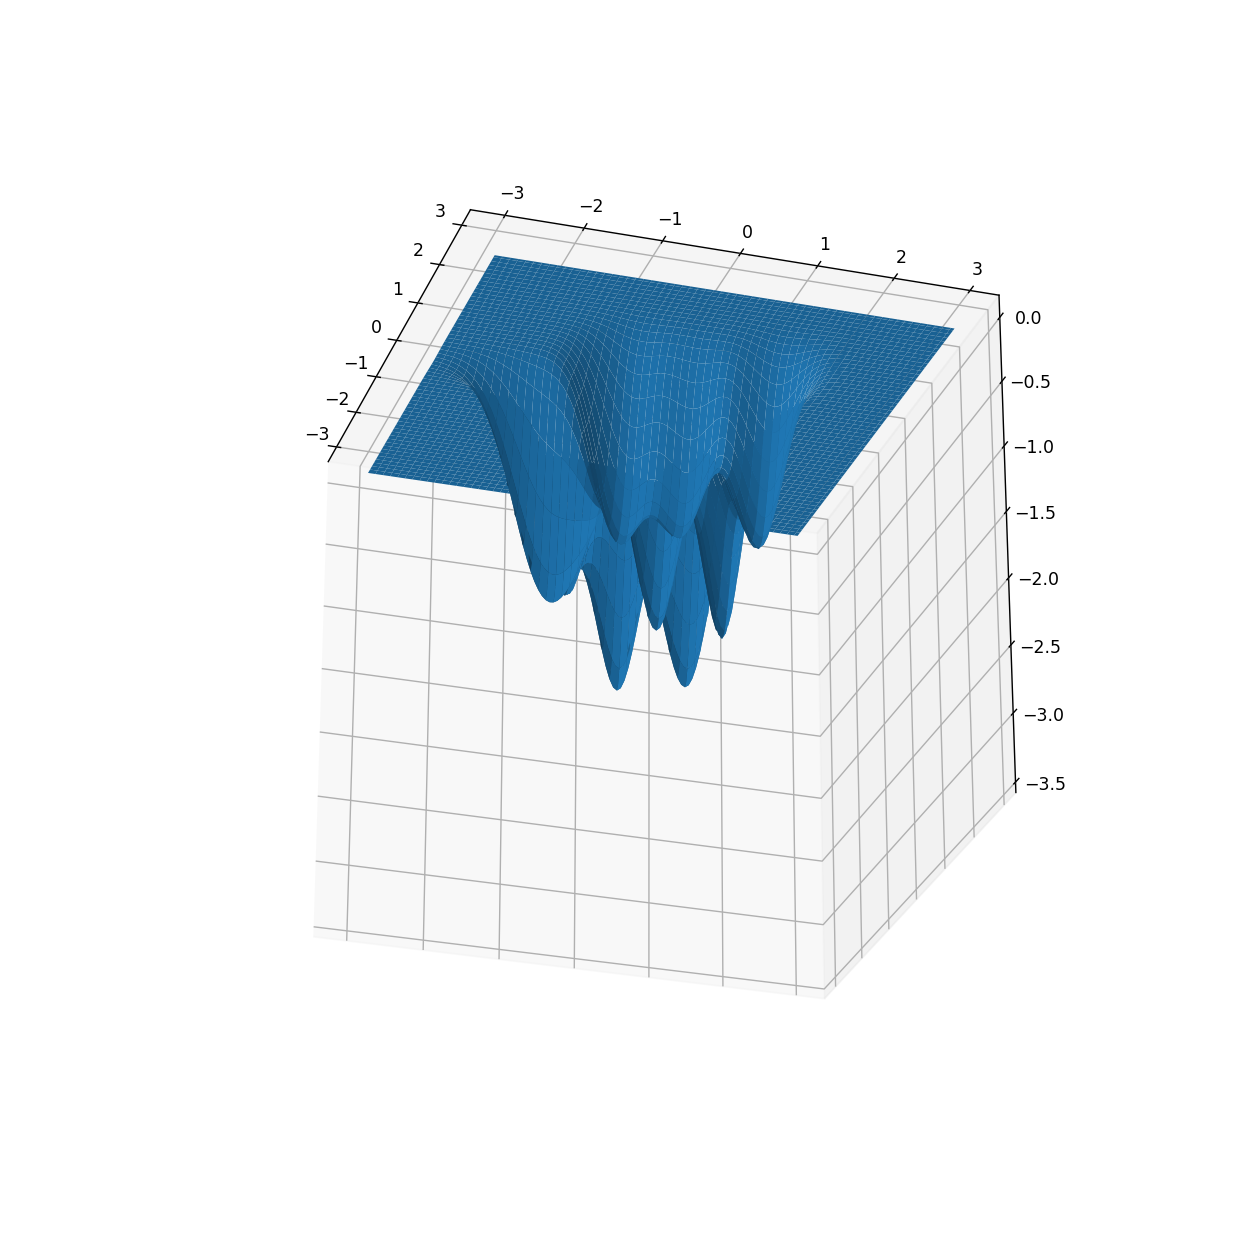

In [5]:
# Plot 3d version (better with matplotlib notebook activated)
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(-3.5, 0.1)
p = ax.plot_surface(xx, yy, z, rstride=2, cstride=2, linewidth=0)

In [ ]:
# Plot gradient of the potential to check consistency
zgrad = gradnorm(xx,yy)
plt.contour(xx, yy, zgrad, 25)
plt.axes().set_aspect('equal')
plt.colorbar()

In [ ]:
a=[3,4]

In [ ]:
np.linalg.norm(a)

In [ ]:
gradpot(1.5,0.8)

In [ ]:
# Create an interpolated version of the function and plot for consistency
fun = interp2d(xx, yy, z, kind='linear')
zz = fun(x,y)
plt.contour(xx, yy, zz, 25)
plt.axes().set_aspect('equal')

In [ ]:
x,y = [2,3]

In [ ]:
import numpy as np

In [ ]:
print(4*np.random.rand() - 2, 4*np.random.rand() - 2)